## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

In [4]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [5]:
# Combine the data into a single dataset
pharma_complete_df = pd.merge(mouse_metadata, study_results, how = "left", on=["Mouse ID", "Mouse ID"])

In [6]:
# Display the data table for preview
pharma_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,count
0,k403,Ramicane,Male,21,16,0,45.000000,0,1
1,k403,Ramicane,Male,21,16,5,38.825898,0,1
2,k403,Ramicane,Male,21,16,10,35.014271,1,1
3,k403,Ramicane,Male,21,16,15,34.223992,1,1
4,k403,Ramicane,Male,21,16,20,32.997729,1,1
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,1
1889,z969,Naftisol,Male,9,30,30,65.841013,3,1
1890,z969,Naftisol,Male,9,30,35,69.176246,4,1
1891,z969,Naftisol,Male,9,30,40,70.314904,4,1


In [7]:
# Checking the number of mice.
mice_count_df = len(pharma_complete_df["Mouse ID"].unique())
mice_count_df

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mouse_id_dups = pharma_complete_df.pharma_complete_df.duplicated["Mouse ID","Timepoint"]
# mouse_id_dups

mouse_id_dups = pharma_complete_df.loc[pharma_complete_df.duplicated(subset = ["Mouse ID","Timepoint"]),"Mouse ID"].unique()
mouse_id_dups

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
MouseID_dups = pharma_complete_df[pharma_complete_df["Mouse ID"].isin(mouse_id_dups) == True]                                               
MouseID_dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,count
908,g989,Propriva,Female,21,26,0,45.000000,0,1
909,g989,Propriva,Female,21,26,0,45.000000,0,1
910,g989,Propriva,Female,21,26,5,48.786801,0,1
911,g989,Propriva,Female,21,26,5,47.570392,0,1
912,g989,Propriva,Female,21,26,10,51.745156,0,1
913,g989,Propriva,Female,21,26,10,49.880528,0,1
914,g989,Propriva,Female,21,26,15,51.325852,1,1
915,g989,Propriva,Female,21,26,15,53.442020,0,1
916,g989,Propriva,Female,21,26,20,55.326122,1,1
917,g989,Propriva,Female,21,26,20,54.657650,1,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pharma_final_df = pharma_complete_df[pharma_complete_df["Mouse ID"].isin(mouse_id_dups) == False]                                               
pharma_final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,count
0,k403,Ramicane,Male,21,16,0,45.000000,0,1
1,k403,Ramicane,Male,21,16,5,38.825898,0,1
2,k403,Ramicane,Male,21,16,10,35.014271,1,1
3,k403,Ramicane,Male,21,16,15,34.223992,1,1
4,k403,Ramicane,Male,21,16,20,32.997729,1,1
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,1
1889,z969,Naftisol,Male,9,30,30,65.841013,3,1
1890,z969,Naftisol,Male,9,30,35,69.176246,4,1
1891,z969,Naftisol,Male,9,30,40,70.314904,4,1


In [11]:
# Checking the number of mice in the clean DataFrame.
mice_clean_df = pharma_final_df["Mouse ID"].count()
mice_clean_df

1880

In [12]:
# Rename column names for Final Clean Data
pharma_final_df = pharma_final_df.rename(columns={"Mouse ID":"Mouse_ID","Drug Regimen":"Drug_Regimen", "Tumor Volume (mm3)":"Tumor_Volume_(mm3)", "Metastatic Sites":"Metastatic_Sites","Weight (g)":"Weight_g"})
pharma_final_df.head()

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_(mm3),Metastatic_Sites,count
0,k403,Ramicane,Male,21,16,0,45.000000,0,1
1,k403,Ramicane,Male,21,16,5,38.825898,0,1
2,k403,Ramicane,Male,21,16,10,35.014271,1,1
3,k403,Ramicane,Male,21,16,15,34.223992,1,1
4,k403,Ramicane,Male,21,16,20,32.997729,1,1


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [14]:
#Summary Index 
regimen_index_df = pharma_final_df.groupby(["Drug_Regimen"])
regimen_index_df.count()

,Mouse_ID,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_(mm3),Metastatic_Sites,count
Drug_Regimen,,,,,,,,
Capomulin,230,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181,181


In [15]:
# Generate a summary statistics table of mean
# # This method produces everything in a single groupby function
regimen_mean_df = pharma_final_df.groupby(["Drug_Regimen"])["Tumor_Volume_(mm3)"].mean()
regimen_mean_df

Drug_Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor_Volume_(mm3), dtype: float64

In [16]:
# Generate a summary statistics table of median
# # This method produces everything in a single groupby function
regimen_median_df = pharma_final_df.groupby(["Drug_Regimen"])["Tumor_Volume_(mm3)"].median()
regimen_median_df

Drug_Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor_Volume_(mm3), dtype: float64

In [17]:
# Generate a summary statistics table of variance
# # This method produces everything in a single groupby function
regimen_var_df = pharma_final_df.groupby(["Drug_Regimen"])["Tumor_Volume_(mm3)"].var()
regimen_var_df

Drug_Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor_Volume_(mm3), dtype: float64

In [18]:
# Generate a summary statistics table of standard deviation
# # This method produces everything in a single groupby function
regimen_std_df = pharma_final_df.groupby(["Drug_Regimen"])["Tumor_Volume_(mm3)"].std()
regimen_std_df

Drug_Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor_Volume_(mm3), dtype: float64

In [19]:
# Generate a summary statistics table of SEM
# # This method produces everything in a single groupby function
regimen_sem_df = pharma_final_df.groupby(["Drug_Regimen"])["Tumor_Volume_(mm3)"].sem()
regimen_sem_df

Drug_Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor_Volume_(mm3), dtype: float64

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Pandas view

summary_regimen_stats_df = pd.DataFrame({"Mean": regimen_mean_df,
                                         "Median": regimen_median_df,
                                         "Variance": regimen_var_df,
                                         "Standard Variance": regimen_std_df,
                                         "SEM": regimen_sem_df})

summary_regimen_stats_df.style.format({"Mean": "{:,.2f}",
                                       "Median": "{:,.2f}",
                                       "Variance": "{:,.2f}",
                                       "Standard Variance": "{:,.2f}",
                                       "SEM": "{:,.2f}"})

,Mean,Median,Variance,Standard Variance,SEM
Drug_Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [21]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# # Matplotlib View
# summary_regimen_matstats_df= [{"Drug Regimen":Drug_Regimen,
#                                "Mean": regimen_mean_df,
#                                 "Median": regimen_median_df,
#                                 "Variance": regimen_var_df,
#                                 "Standard Variance": regimen_std_df,
#                                 "SEM": regimen_sem_df}]
# summary_regimen_matstats_df
    

## Bar and Pie Charts

In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
regimen_group = pharma_final_df.groupby("Drug_Regimen")
mice_count = regimen_group["Drug_Regimen"].count()
mice_count

Drug_Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug_Regimen, dtype: int64

<IPython.core.display.Javascript object>


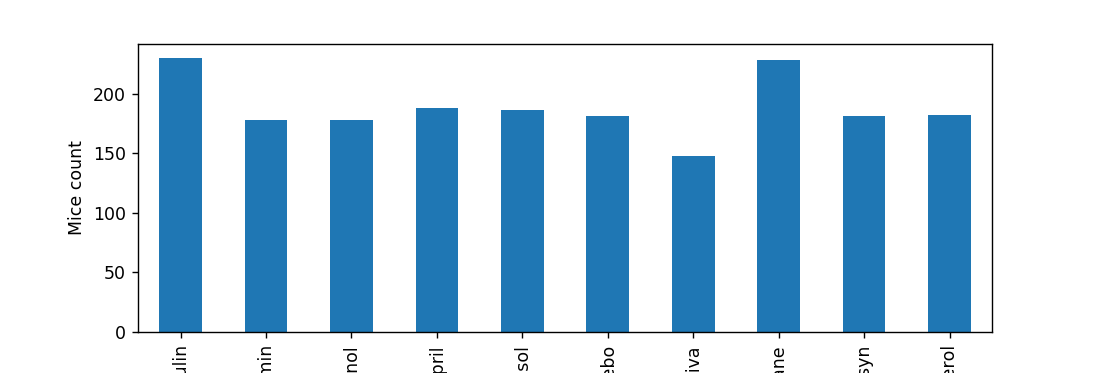

Text(0, 0.5, 'Mice count')

In [23]:
regimen_chart = mice_count.plot(kind='bar')

# Set the xlabel and ylabel using class methods
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("Mice count")
# regimen_chart.set_title("Mice per Drug Regimen")
# regimen_chart.show()
# regimen_chart.tight_layout()

<IPython.core.display.Javascript object>


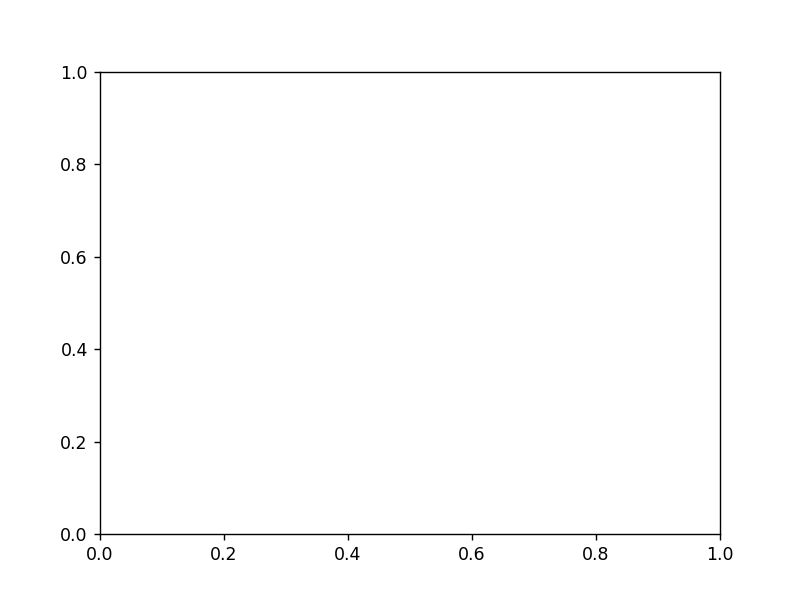

In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#Total number of mice for each treatment throughout the course of the study using pandas. 
fig = plt.figure();
ax = fig.add_subplot(1, 1, 1)
regimen = pd.unique(pharma_final_df["Drug_Regimen"].tolist())



In [25]:
# x_axis = np.arange(len(mice))
# mice = x_axis

In [26]:
# # Create the ticks for our bar chart's x axis
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, regimen )

In [27]:
# # Set the limits of the x axis
# plt.xlim(-0.75, len(x_axis)-0.25)

In [28]:
# # Set the limits of the y axis
# plt.ylim(0, max(mice)+50)

In [29]:
# # Give the chart a title, x label, and y label
# plt.title("Mice per Drug Regimen")
# plt.xlabel("Mice count")
# plt.ylabel("Mice per Drug Regimen")

In [30]:
# # Create a bar chart based upon the above data
# plt.bar(x_axis, mice, color="g",alpha=0.6, align="center")
# plt.show()

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [34]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [37]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
